# YULU

## About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India,

## Problem Statement

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### The company wants to know:

    - Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
    - How well those variables describe the electric cycle demands

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, geom, binom
import math
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import chisquare, chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import pearsonr, spearmanr
from scipy.stats import levene, kruskal, shapiro, mannwhitneyu

# Data loading and creating netflix data frame

In [3]:
# Load Yulu data and create a dataframe on it
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

# Exploratory analysis of data frame (from below code)
### Insight : 
    - 12 Columns and 10886 rows are available in the data.
    - 8 Columns are with int64, 3 columns with float64 data type and 1 columns are with object data type
    - Data doesnt contain any null values in it
    - Hourly based details of the electric cycles rentable are available in the data.

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## There is no null available in any column of the data (from below code)

In [5]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

 ## Registered and Count column, mean and Standard deviation is more when compared to other columns

In [67]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886.0,NaN,NaN,NaN,2.506614,1.116174,1.0,2.0,3.0,4.0,4.0
holiday,10886.0,NaN,NaN,NaN,0.028569,0.166599,0.0,0.0,0.0,0.0,1.0
workingday,10886.0,NaN,NaN,NaN,0.680875,0.466159,0.0,0.0,1.0,1.0,1.0
weather,10886.0,NaN,NaN,NaN,1.418427,0.633839,1.0,1.0,1.0,2.0,4.0
temp,10886.0,NaN,NaN,NaN,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,NaN,NaN,NaN,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaN,NaN,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaN,NaN,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
casual,10886.0,NaN,NaN,NaN,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


In [6]:
print('Shape of dataframe is', df.shape)
print('no of elements of dataframe is', df.size)
print('dimension of dataframe is', df.ndim)
print('number of rows is ', len(df))

Shape of dataframe is (10886, 12)
no of elements of dataframe is 130632
dimension of dataframe is 2
number of rows is  10886


In [9]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## Conversion categorical column to category datatype
#### Insight : 
    Season, holiday, workingday & weather columns need to be converted to 'Category' datatype from Object datatype.
    Datetime column need to be converted to 'datetime' datatype from object

In [7]:
df['season'] =df['season'].astype(dtype = 'category')
df['holiday'] = df['holiday'].astype(dtype = 'category')
df['workingday'] = df['workingday'].astype(dtype = 'category')
df['weather'] = df['weather'].astype(dtype = 'category')
df['datetime'] = pd.to_datetime(df['datetime'])

# 2.	Non-Graphical and Graphical Analysis
#### Target - Column (dependent variable) - Count
#### Feature - column (independent variable) -  season, holiday, workingday, 'weather, temp, atemp, humidity, windspeed

### Datetime  column
#### Insight : 
     - 10886 number of user's transaction are available and all are unique records (no repetition).
     - Date starts from '2011-01-01' to '2012-12-19'.
     - hourly based data is available in this column.
     - Missing Value - Not available.

In [80]:
df['datetime'].nunique()

10886

In [82]:
df['datetime'].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-19T21:00:00.000000000', '2012-12-19T22:00:00.000000000',
       '2012-12-19T23:00:00.000000000'], dtype='datetime64[ns]')

In [83]:
df['datetime'].value_counts()

2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64

In [117]:
print('Maximum value of datetime', df['datetime'].max())
print('Minimum value of datetime', df['datetime'].min())

Maximum value of datetime 2012-12-19 23:00:00
Minimum value of datetime 2011-01-01 00:00:00


### Season  column
#### Input : 
     - season (1: spring, 2: summer, 3: fall, 4: winter)
#### Insight : 
     - 4 unique season are available in this data.
     - All Season data as almost equal records. As per date and time, each seasons are equal.
     - Missing Value - Not available.
#### Recommendation:
    - All seasons are equal, any discouts, offers can be done in any season

In [84]:
df['season'].nunique()

4

In [85]:
df['season'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [90]:
np.round(df['season'].value_counts(normalize = True) *100, 2)

4    25.11
2    25.11
3    25.11
1    24.67
Name: season, dtype: float64

Text(0.5, 1.0, 'Season wise count')

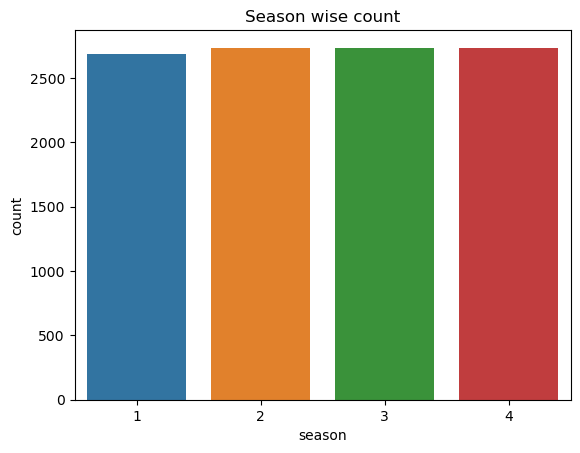

In [92]:
sns.countplot(data = df, x = 'season')
plt.title('Season wise count')

### Holiday  column
#### Assumption :
     - Holiday is 1 and Non-Holiday is 0.

#### Insight : 
     - holiday columns have 2 category which is 0 and 1.
     - 97% trascation are from Non-Holiday days.
     - As per calender, Holidays are less in any particular year.
#### Recommendation:
    - Any offers, promotion activity can be done on non-holiday days.
    - In few holiday days, users like to travel to the temples, hill station etc,. Yulu electric cycle should be placed in those region, so that users can use services.

In [93]:
df['holiday'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [94]:
df['holiday'].value_counts(normalize = True) * 100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

Text(0.5, 1.0, 'holiday wise count')

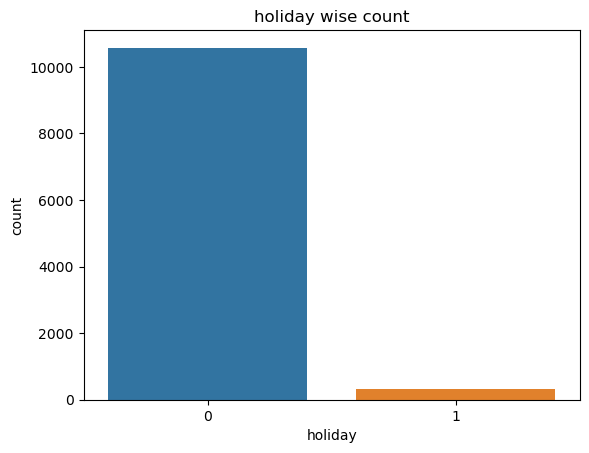

In [95]:
sns.countplot(data = df, x = 'holiday')
plt.title('holiday wise count')

### Workingday  column
#### Input:
     - if day is neither weekend nor holiday is 1, otherwise is 0.
     - Working day = 1
     - Weekend and holiday = 0
#### Insight : 
     - Workingday columns have 2 category.
     - 68% trascation are from working day category.
#### Recommendation:
    - provide ads and offers on location where most of the offices are availalbe on working days.
    - similary provide ads and offers on location where user prefer weekends outing , temples etc on holidays / weekends.

In [98]:
df['workingday'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [99]:
df['workingday'].nunique()

2

In [100]:
df['workingday'].value_counts(normalize = True) * 100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

Text(0.5, 1.0, 'workingday wise count')

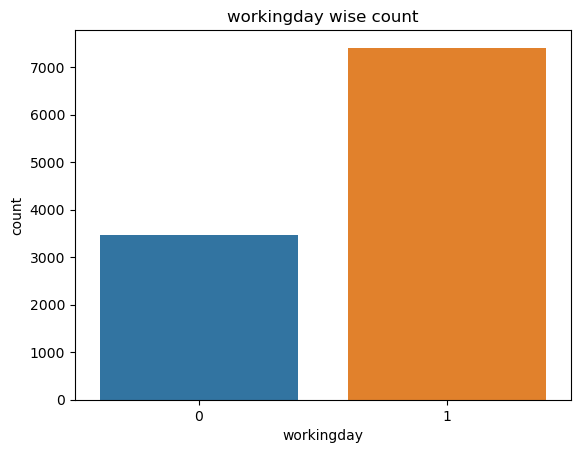

In [101]:
sns.countplot(data = df, x = 'workingday')
plt.title('workingday wise count')

### weather  column
#### Input:
    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#### Insight : 
     - weather columns have 4 category.
     - weather 1 as majority of records of 66%.
     - Weahter 2 as 2nd hightest of records of 26%.
   
#### Recommendation:
    - As most of users prefer clear weather for riding electric cycle. So based on the weather forecast electric cycles can be deployed in peak locations.
    - May be some incentive on 2 category weather, so that user want to ride and raincoat can be added in electric cycle - as user can be benifetted with it in rainy days.

In [106]:
df['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [103]:
df['weather'].nunique()

4

In [104]:
df['weather'].value_counts(normalize = True) * 100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

Text(0.5, 1.0, 'weather wise count')

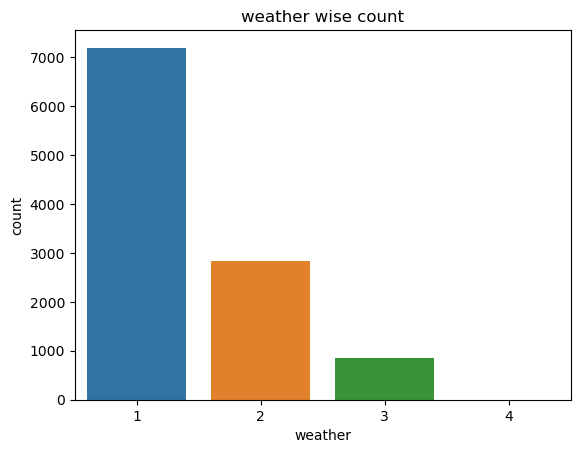

In [105]:
sns.countplot(data = df, x = 'weather')
plt.title('weather wise count')

### temp  column
#### Insight : 
     - temp columns is continous variable and 49 unique records are available.
     - Temp 14.67 Celsius as majority of records about 4.2%.
     - Majority records is in range from 12 to 32 Celsius.
     - range is from 0.82 to 41.
     - Outlier - Not avaiable
   
#### Recommendation:
    - exterme temp, user wont perfer to ride and as per histogram 12 to 32 Celsius is the normal range where user want to ride. So, early morning and late nights - electric cycle supply can be reduced (logistics cost can be reduced).
    

In [131]:
df['temp'].nunique()

49

In [161]:
df['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [122]:
(df['temp'].value_counts(normalize = True) * 100).head()

14.76    4.289914
26.24    4.161308
28.70    3.922469
13.94    3.793864
18.86    3.729561
Name: temp, dtype: float64

Text(0.5, 1.0, 'temp wise count')

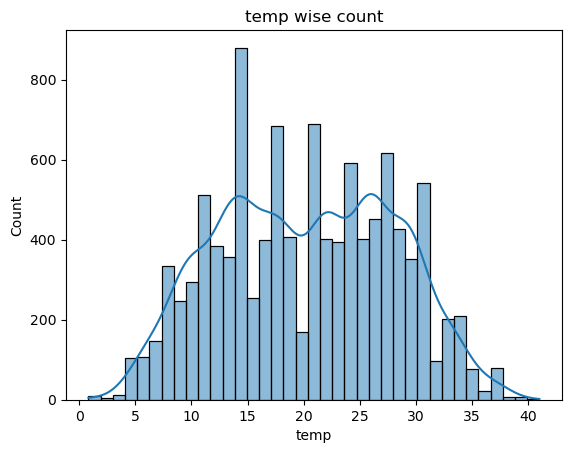

In [113]:
sns.histplot(data = df, x = 'temp', kde = True)
plt.title('temp wise count')

Text(0.5, 1.0, 'temp column for outlier detection')

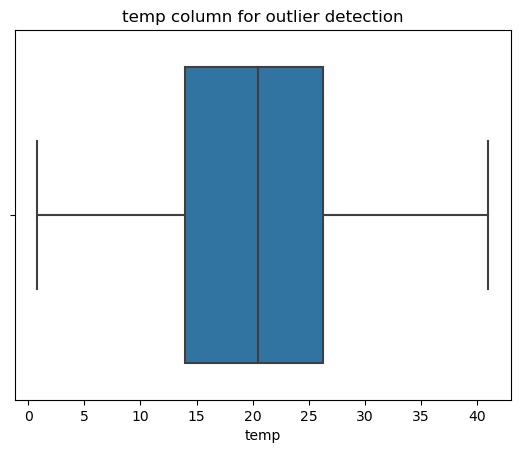

In [141]:
# Outlier detection
sns.boxplot(data = df, x = 'temp')
plt.title('temp column for outlier detection')

### atemp  column (atemp: feeling temperature in Celsius)
#### Insight : 
     - atemp columns is continous variable and 60 records are unique.
     - atemp 31.060 Celsius as majority of records about 6.1%.
     - Majority records is in range from 15 to 37 Celsius.
     - If it is near sea shore, then atemp will be higher.
     - range is from 0.76 to 45.4.
     - Outlier - Not avaiable
   
#### Recommendation:
    - exterme temp, user wont perfer to ride and as per histogram 12 to 32 Celsius is the normal range where user want to ride. So, early morning and late nights - electric cycle supply can be reduced (logistics cost can be reduced).
    - atemp at sea shore, so early morning and evening - electric cycle supply can be increased, user prefer less atemp for a ride.

In [130]:
df['atemp'].nunique()

60

In [160]:
df['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [123]:
(df['atemp'].value_counts(normalize = True) * 100).head()

31.060    6.163880
25.760    3.885725
22.725    3.729561
20.455    3.674444
26.515    3.628514
Name: atemp, dtype: float64

Text(0.5, 1.0, 'atemp wise count')

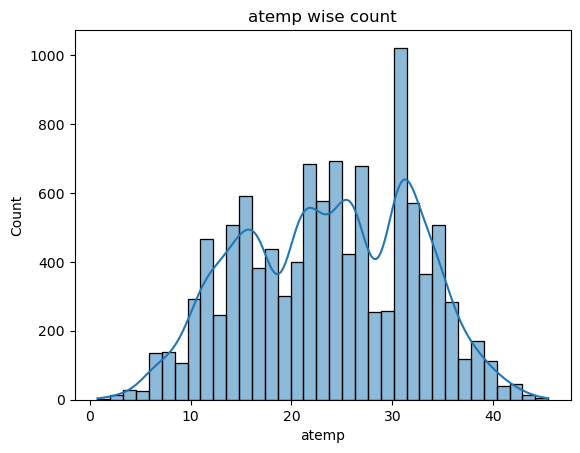

In [124]:
sns.histplot(data = df, x = 'atemp', kde = True)
plt.title('atemp wise count')

Text(0.5, 1.0, 'atemp column for outlier detection')

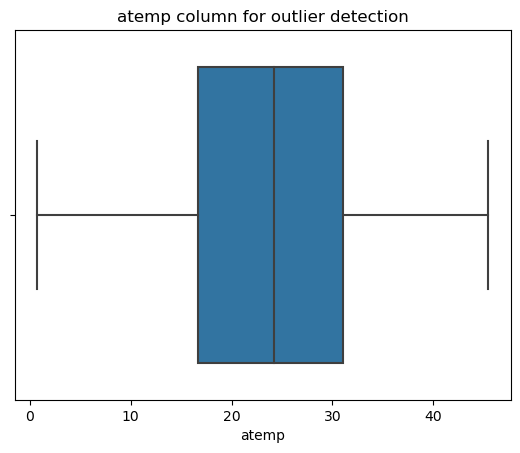

In [140]:
# Outlier detection
sns.boxplot(data = df, x = 'atemp')
plt.title('atemp column for outlier detection')

### humidity  column
#### Insight : 
     - humidity columns is continous variable and 89 records are unique.
     - Temp 88 Celsius as majority of records about 3.3%.
     - Majority records is in range from 40 to 90 (histogram.
     - range is from 0 to 100.
     - Outlier - 1 avaiable
   
#### Recommendation:
    - Mid range humidity is ideal for normal user( as per histogram). So users prefer to use in this range - more electric cycles can be added in this humidity range and incentive for more usage can be provided.

In [129]:
df['humidity'].nunique()

89

In [159]:
df['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [127]:
(df['humidity'].value_counts(normalize = True) * 100).head()

88    3.380489
94    2.976300
83    2.902811
87    2.654786
70    2.379203
Name: humidity, dtype: float64

Text(0.5, 1.0, 'humidity wise count')

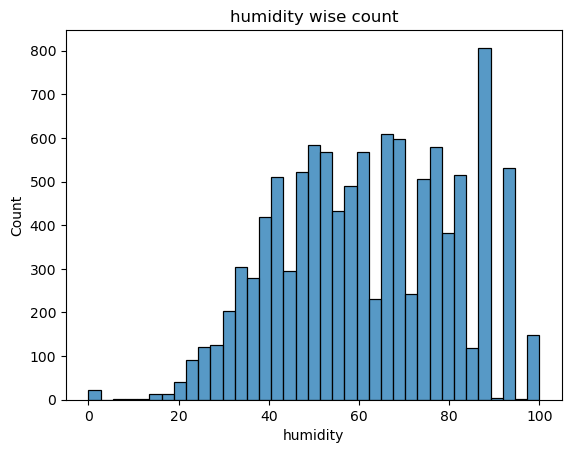

In [125]:
sns.histplot(data = df, x = 'humidity')
plt.title('humidity wise count')

Text(0.5, 1.0, 'humidity column for outlier detection')

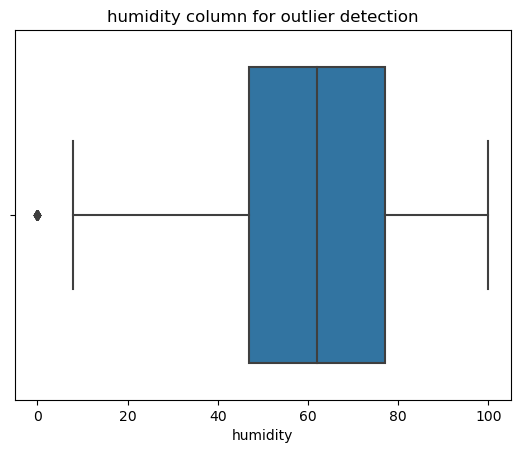

In [139]:
# Outlier detection
sns.boxplot(data = df, x = 'humidity')
plt.title('humidity column for outlier detection')

### windspeed  column
#### Input : windspeed: wind speed
#### Insight : 
     - windspeed columns is continous variable and 28 records are unique.
     - Majority of till there was no windspeed about 12%.
     - Majority records is in range from 0 to 28 (countplot).
     - range is from 0 to 56.99.
     - Outlier are avaible in the data.
   
#### Recommendation:
    - In less wind speed, most of the user want to ride electric cycle and vehicle should be availalbe in those time.

In [134]:
df['windspeed'].nunique()

28

In [136]:
(df['windspeed'].value_counts(normalize = True) * 100).head()

0.0000     12.061363
8.9981     10.288444
11.0014     9.709719
12.9980     9.571927
7.0015      9.498438
Name: windspeed, dtype: float64

In [158]:
df['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

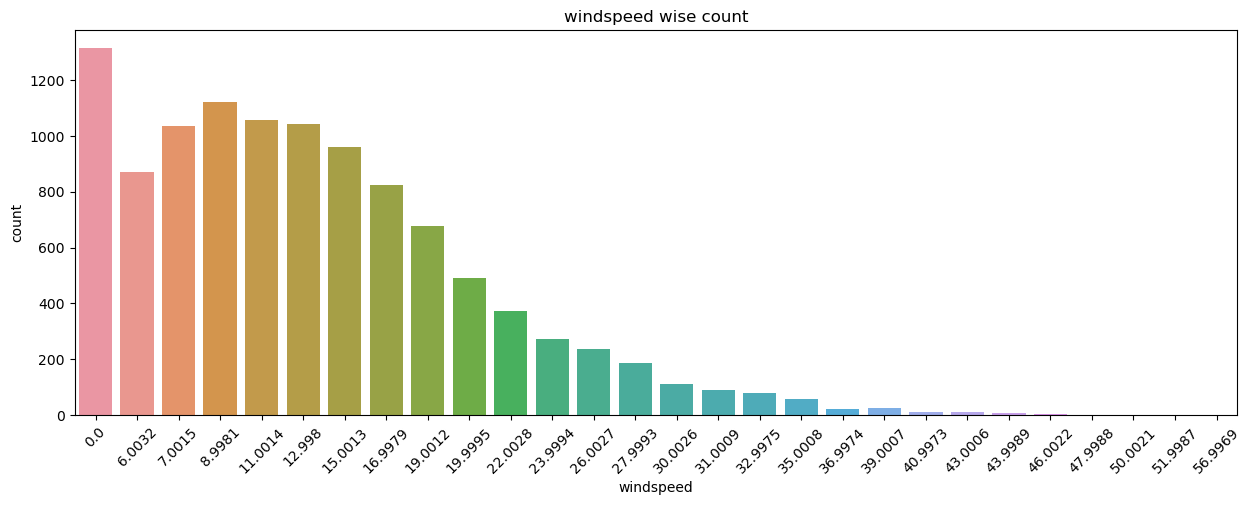

In [149]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'windspeed')
plt.title('windspeed wise count')
plt.xticks(size = 10, rotation = 45)
plt.show()

Text(0.5, 1.0, 'windspeed wise frequency')

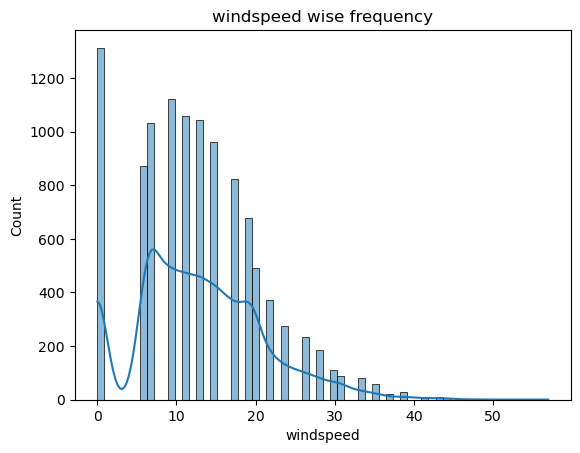

In [152]:
sns.histplot(data = df, x = 'windspeed', kde = True)
plt.title('windspeed wise frequency')

Text(0.5, 1.0, 'windspeed column for outlier detection')

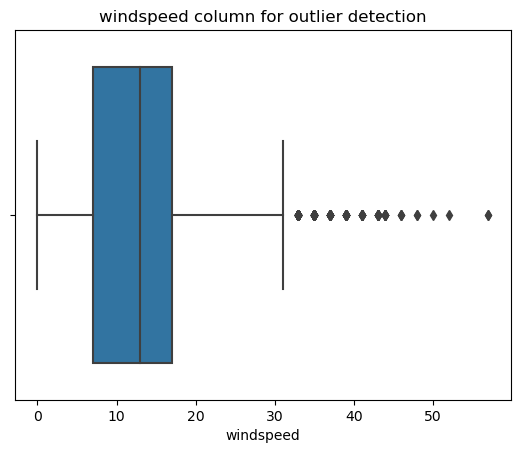

In [143]:
# Outlier detection
sns.boxplot(data = df, x = 'windspeed')
plt.title('windspeed column for outlier detection')

### casual   column
#### casual: count of casual users
#### Insight : 
     - casual columns as 309 records are unique.
     - All of cascual user (non-registered/non regular users) and not used cycle for even once and about 9% of user are there (majority).
     - Data looks like a exponential curve.
     - Majority records is in < 100 count (histogram).
     - range is from 0 to 367.
     - Lot of outlier are available in the data.
   
#### Recommendation:
    - User who's count = 0 are more, by provide offer, discounts, incentive for first time user. So that they can start using cycle.
    - Similarly, another offer can be provide for casual user whose count is more than 0. So that they tend to cycle continously for long period.

In [153]:
df['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [165]:
(df['casual'].value_counts(normalize = True) * 100).head()

0    9.057505
1    6.127136
2    4.473636
3    4.023516
4    3.251883
Name: casual, dtype: float64

In [156]:
df['casual'].nunique()

309

Text(0.5, 1.0, 'casual analyis')

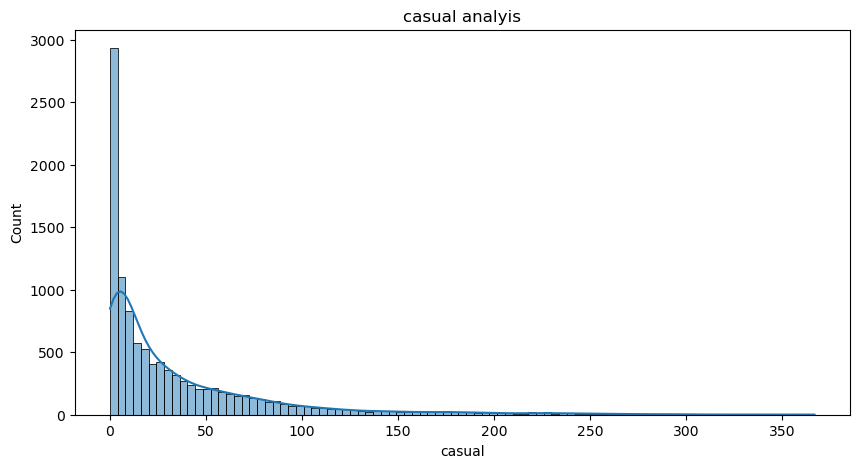

In [163]:
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'casual', kde = True)
plt.title('casual analyis')

Text(0.5, 1.0, 'casual column analysis and outlier detection')

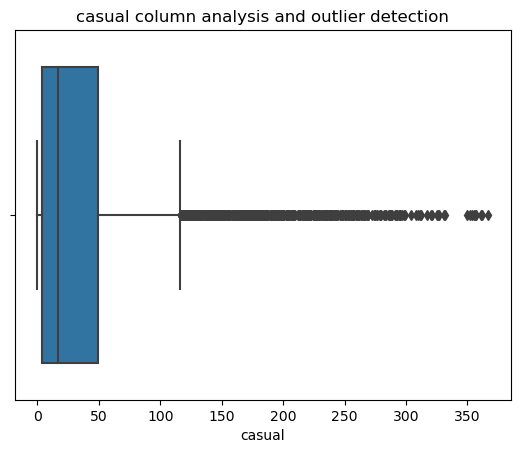

In [164]:
sns.boxplot(data = df, x = 'casual')
plt.title('casual column analysis and outlier detection')

### registered   column
#### registered: count of registered users
#### Insight : 
     - registered columns as 309 records are unique.
     - Most of them registered and not used cycle for even once and about 9% of user are there (majority).
     - Data looks like a exponential curve.
     - Majority records is in < 100 count (histogram).
     - range is from 0 to 367.
     - Lot of outlier are available in the data.
   
#### Recommendation:
    - User who's count = 0 are more, by provide offer, discounts, incentive for first time user. So that they can start using cycle.
    - Similarly, another offer can be provide for existing user whose count is more than 0. So that they tend to cycle continously for long period.

In [166]:
df['registered'].nunique()

731

In [167]:
(df['registered'].value_counts(normalize = True) * 100).head()

3    1.791292
4    1.745361
5    1.625942
6    1.423847
2    1.377917
Name: registered, dtype: float64

In [168]:
df['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

Text(0.5, 1.0, 'registered analyis')

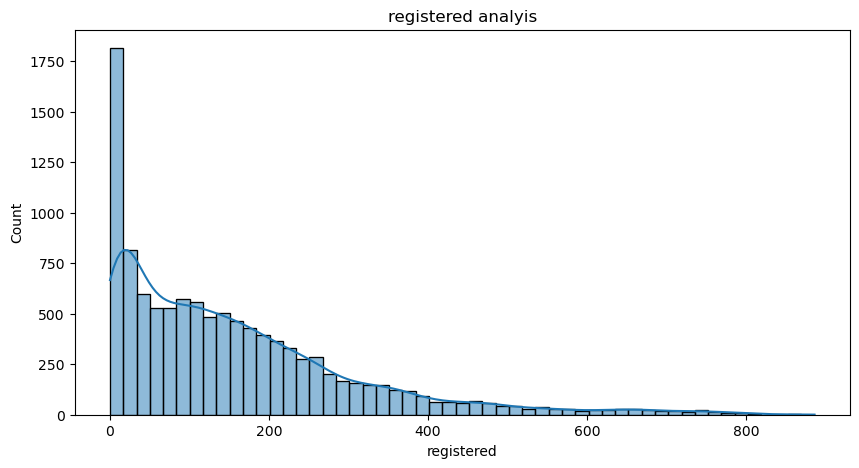

In [170]:
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'registered', kde = True)
plt.title('registered analyis')

Text(0.5, 1.0, 'registered column analysis and outlier detection')

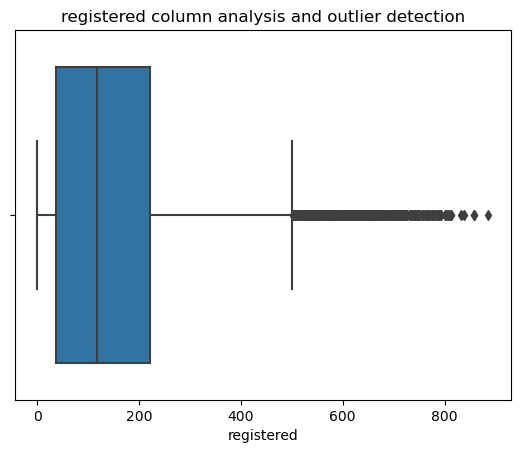

In [171]:
sns.boxplot(data = df, x = 'registered')
plt.title('registered column analysis and outlier detection')

### count  column
#### count: count of total rental bikes including both casual and registered
#### Insight : 
     - count columns as 822 records are unique.
     - Majority of count records- 5 and about 1.55%
     - Data looks like a exponential curve.
     - Majority records is in < 400 count (histogram).
     - range is from 1 to 977.
     - Lot of outlier are available in the data.
   
#### Recommendation:
    - offer/ dicounts can be provide for existing user like for every use of cycle next trip will have some discount. So that they tend to cycle continously for long period.

In [172]:
df['count'].nunique()

822

In [173]:
(df['count'].value_counts(normalize = True) * 100).head()

5    1.552453
4    1.368730
3    1.322800
6    1.240125
2    1.212567
Name: count, dtype: float64

In [174]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

Text(0.5, 1.0, 'count analyis')

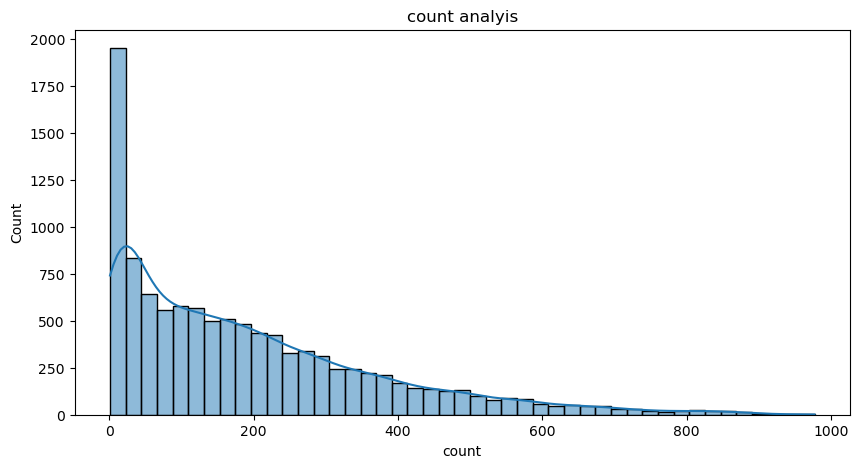

In [175]:
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'count', kde = True)
plt.title('count analyis')

Text(0.5, 1.0, 'count column analysis and outlier detection')

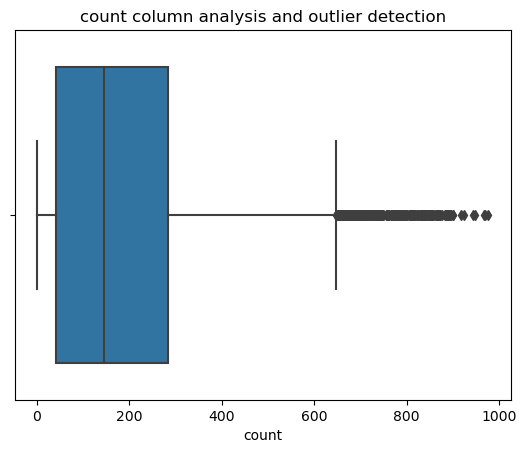

In [176]:
sns.boxplot(data = df, x = 'count')
plt.title('count column analysis and outlier detection')

# Bivariate plot

#### Insights:
     - count wrt season:
         - Season 1's 75percentile is less than other seasons median.
         - All seasons as lot of outliers.
         - season 3 median is hightest in all seasons.
     - count wrt holiday:
         - Median of holiday and non holiday both are almost same.
         - Non holiday have more outliers.
     - count wrt workingday:
         - Workinday (cateogory = 1), as higher median than non working day.
         - Working day have lot of outliers when compared to non working data.
     - count wrt weather:
         - Weather category 1 as more users, when compared to other weather category.
         - weahter category 4 as very less users.
     - count wrt temp:
         - Temp and count as positive corrletion.
     - count wrt atemp:
         - atemp and count as positive corrletion
     - count wrt humidity:
         - humidity and count as negative corrletion.
     - count wrt windspeed:
         - humidity and count as very less positive corrletion.
#### Recommendation
    - Season 2,3 and 4 - user prefer to ride,
    - Weather 1
    - Higher temp and atemp (30 ~ 35 celsius)
    - Lower humidity
    - Windspeed to less (10 to 20)
    - With above mentioned parameter, user prefer to ride. In these time - More cycle should be available, incentive to be provided, discount based on usage etc. So we can increase user ridership.

Text(0.5, 1.0, 'Bivariate plot analysis of count and season')

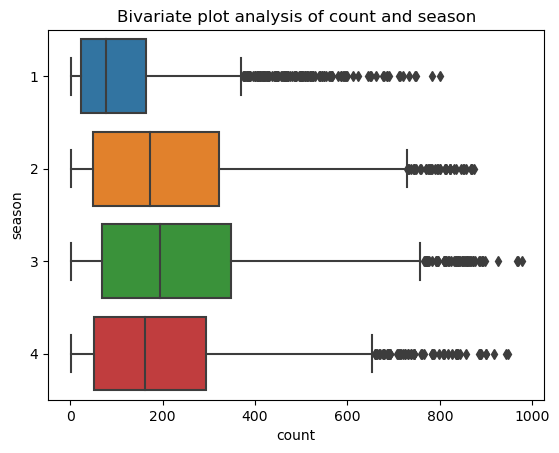

In [203]:
### Bivariate analysis of count wrt season
sns.boxplot(data = df, x = 'count', y = 'season')
plt.title('Bivariate plot analysis of count and season')

Text(0.5, 1.0, 'Bivariate plot analysis of count and holiday')

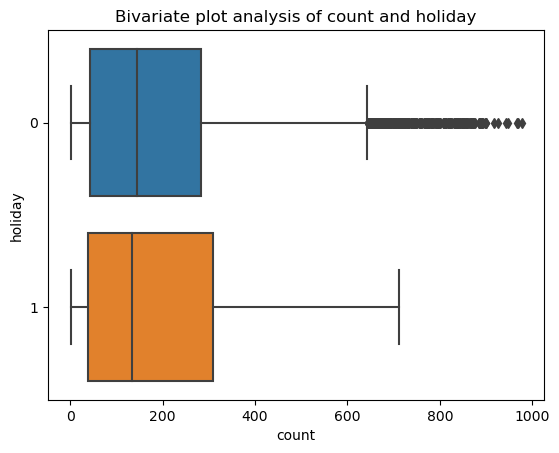

In [204]:
### Bivariate analysis of count wrt holiday
sns.boxplot(data = df, x = 'count', y = 'holiday')
plt.title('Bivariate plot analysis of count and holiday')

Text(0.5, 1.0, 'Bivariate plot analysis of count and workingday')

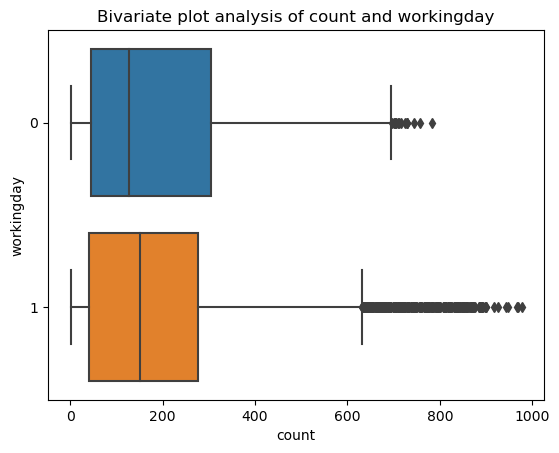

In [180]:
### Bivariate analysis of count wrt workingday
sns.boxplot(data = df, x = 'count', y = 'workingday')
plt.title('Bivariate plot analysis of count and workingday')

Text(0.5, 1.0, 'Bivariate plot analysis of count and weather')

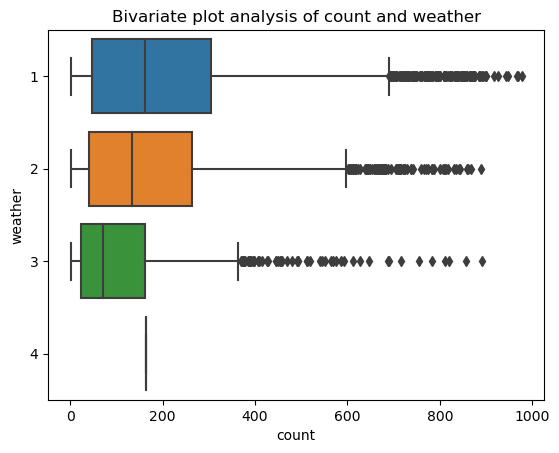

In [181]:
### Bivariate analysis of count wrt weather
sns.boxplot(data = df, x = 'count', y = 'weather')
plt.title('Bivariate plot analysis of count and weather')

Text(0.5, 1.0, 'Bivariate plot analysis of count and temp')

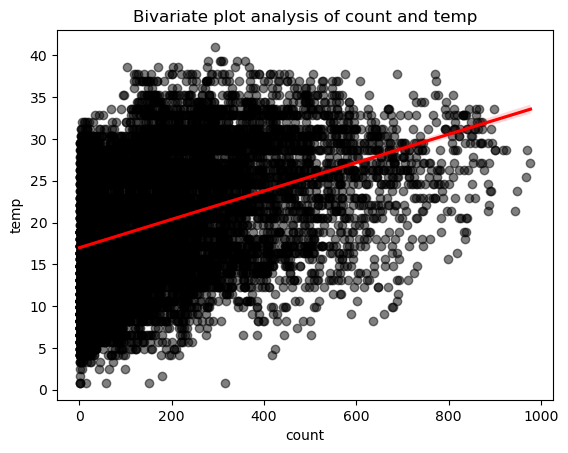

In [193]:
### Bivariate analysis of count wrt temp
sns.regplot(data = df, x = 'count', y = 'temp', scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.title('Bivariate plot analysis of count and temp')

Text(0.5, 1.0, 'Bivariate plot analysis of count and atemp')

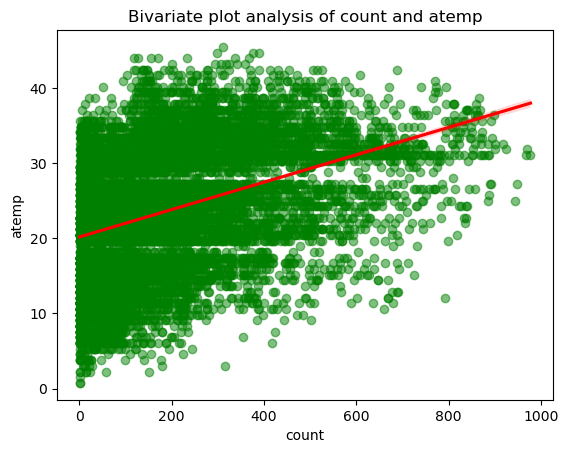

In [197]:
### Bivariate analysis of count wrt atemp
sns.regplot(data = df, x = 'count', y = 'atemp', scatter_kws = {"color": "green", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.title('Bivariate plot analysis of count and atemp')

Text(0.5, 1.0, 'Bivariate plot analysis of count and humidity')

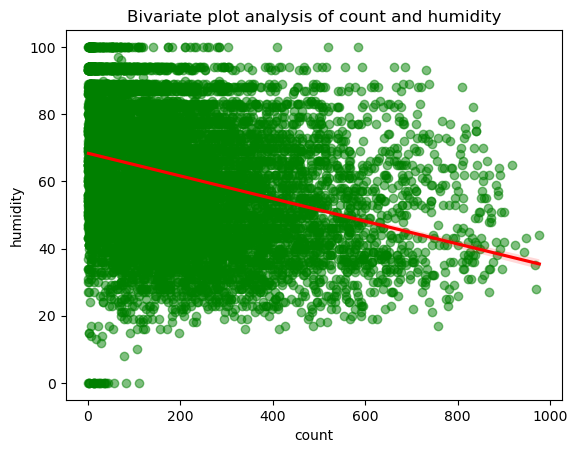

In [200]:
### Bivariate analysis of count wrt humidity
sns.regplot(data = df, x = 'count', y = 'humidity', scatter_kws = {"color": "green", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.title('Bivariate plot analysis of count and humidity')

Text(0.5, 1.0, 'Bivariate plot analysis of count and windspeed')

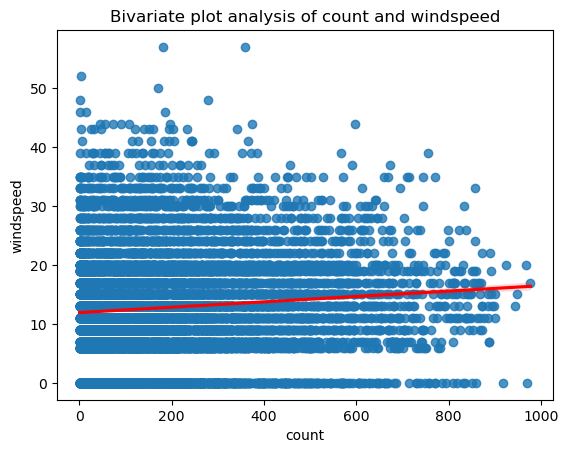

In [202]:
### Bivariate analysis of count wrt windspeed
sns.regplot(data = df, x = 'count', y = 'windspeed', line_kws = {"color": "red"})
plt.title('Bivariate plot analysis of count and windspeed')

## Multivariate analysis
#### Input:
    - Holiday is 1 and Non-Holiday is 0 --> holiday column.
    - Working day = 1 & Weekend and holiday = 0 --> working day column
#### Insights:
    - Season 1 and 2 as more rented cycles on non holiday days.
    - Season 3 and 4 as more rented cycles on holiday days.
    - In all weather, more rented cycles are on non-holiday days.
    - Weather 2 category as more rented cycles on holiday days.
    - Weather 4 category as no rented cycles in all days.
    - Weather 1 category as more rented cycles on working days and non working days also.

#### Recommendation:
    - On Non holiday and season (1 & 2) - add more electric vehicle for rental which need to be near office location.
    - On Holiday and season (1 & 2) - reduce electric vehicles to save logistics cost.
    - On holiday and season (3 & 4) - add more electric vehicle for rental which need to be near tourist destination.
    - Any weather and non-holiday - add more electric vehicles near office locations.
    - Weather 2 category and holiday days -  add more electric vehicle for rental which need to be near office location.
    - Weather 4 category - remove all electric cycles as user prefers to use.
    - Weather 1 category - any day user prefer to rent electric cycles.
    - Above mentioned combination we can increase rental by providing daily incentive for the daily usage, incentive can be coins which can be redeemed after parlicular number of coins collected.
    

Text(0.5, 1.0, 'mulitvariate plot analysis of count and season wrt holiday ')

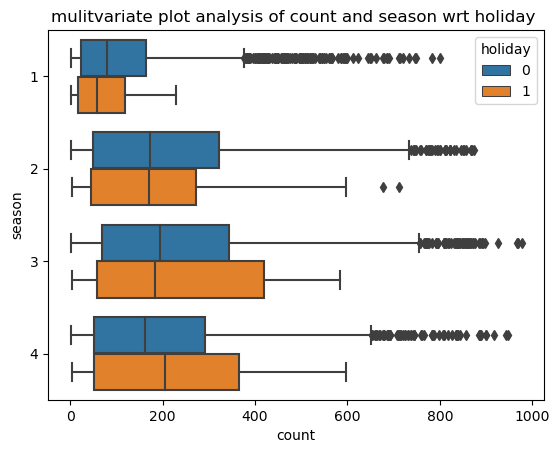

In [206]:
sns.boxplot(data = df, x = 'count', y = 'season', hue = 'holiday')
plt.title('mulitvariate plot analysis of count and season wrt holiday ')

Text(0.5, 1.0, 'mulitvariate plot analysis of count and season wrt workingday')

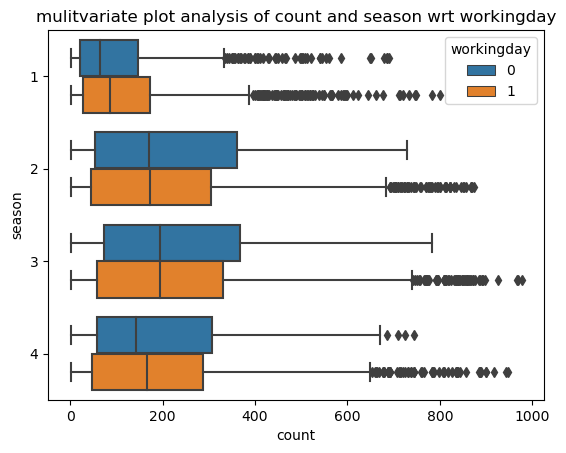

In [207]:
sns.boxplot(data = df, x = 'count', y = 'season', hue = 'workingday')
plt.title('mulitvariate plot analysis of count and season wrt workingday')

Text(0.5, 1.0, 'mulitvariate plot analysis of count and weather wrt holiday ')

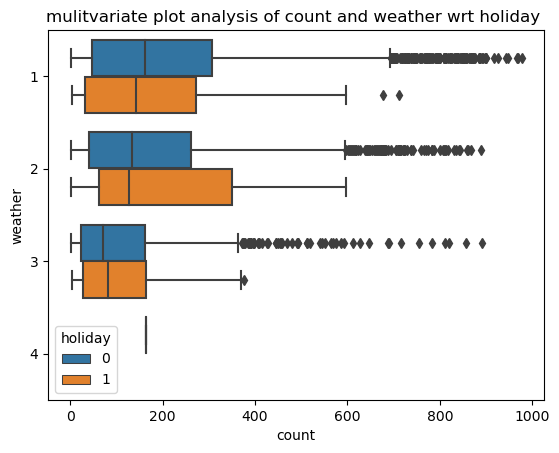

In [10]:
sns.boxplot(data = df, x = 'count', y = 'weather', hue = 'holiday')
plt.title('mulitvariate plot analysis of count and weather wrt holiday ')

Text(0.5, 1.0, 'mulitvariate plot analysis of count and weather wrt workingday ')

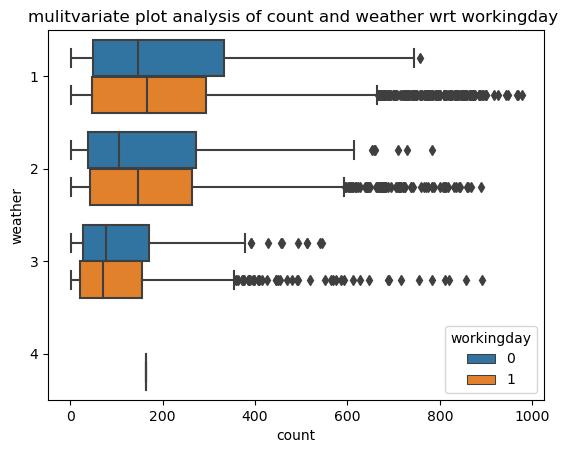

In [11]:
sns.boxplot(data = df, x = 'count', y = 'weather', hue = 'workingday')
plt.title('mulitvariate plot analysis of count and weather wrt workingday ')

## correlation:
#### Insights:
    - temp and atemp are hightly positive correlated.
    - Count and temp are low positive correlated.
    - Count and atemp are low positive correlated.
    - Count and Humidity are low negatively correlated.
    - Count and windspeed are very less positive correlated.
#### Recommendation:
    - As temperature increases, number of electric cycles should be increased (logistics) as user prefer to rent more electric cycles.
    - As Humidity increases, number of electric cycles should be decreased (logistics) as user prefer to rent less electric cycles.
    - As Humidity increases, number of electric cycles should be decreased (logistics) as user prefer to rent less electric cycles.
     - As Windspeed increases, number of electric cycles can be slightly increased (logistics) as user prefer to rent more electric cycles.

C:\Users\trtej\AppData\Local\Temp\ipykernel_16796\1262443069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap="Blues" , linewidth=.5)


<Axes: >

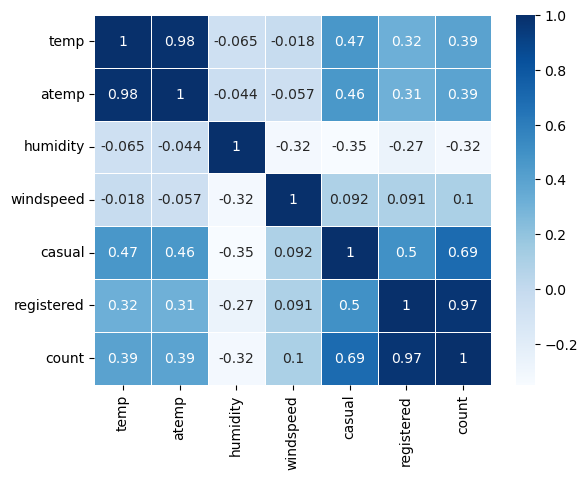

In [210]:
sns.heatmap(df.corr(), annot=True,cmap="Blues" , linewidth=.5)

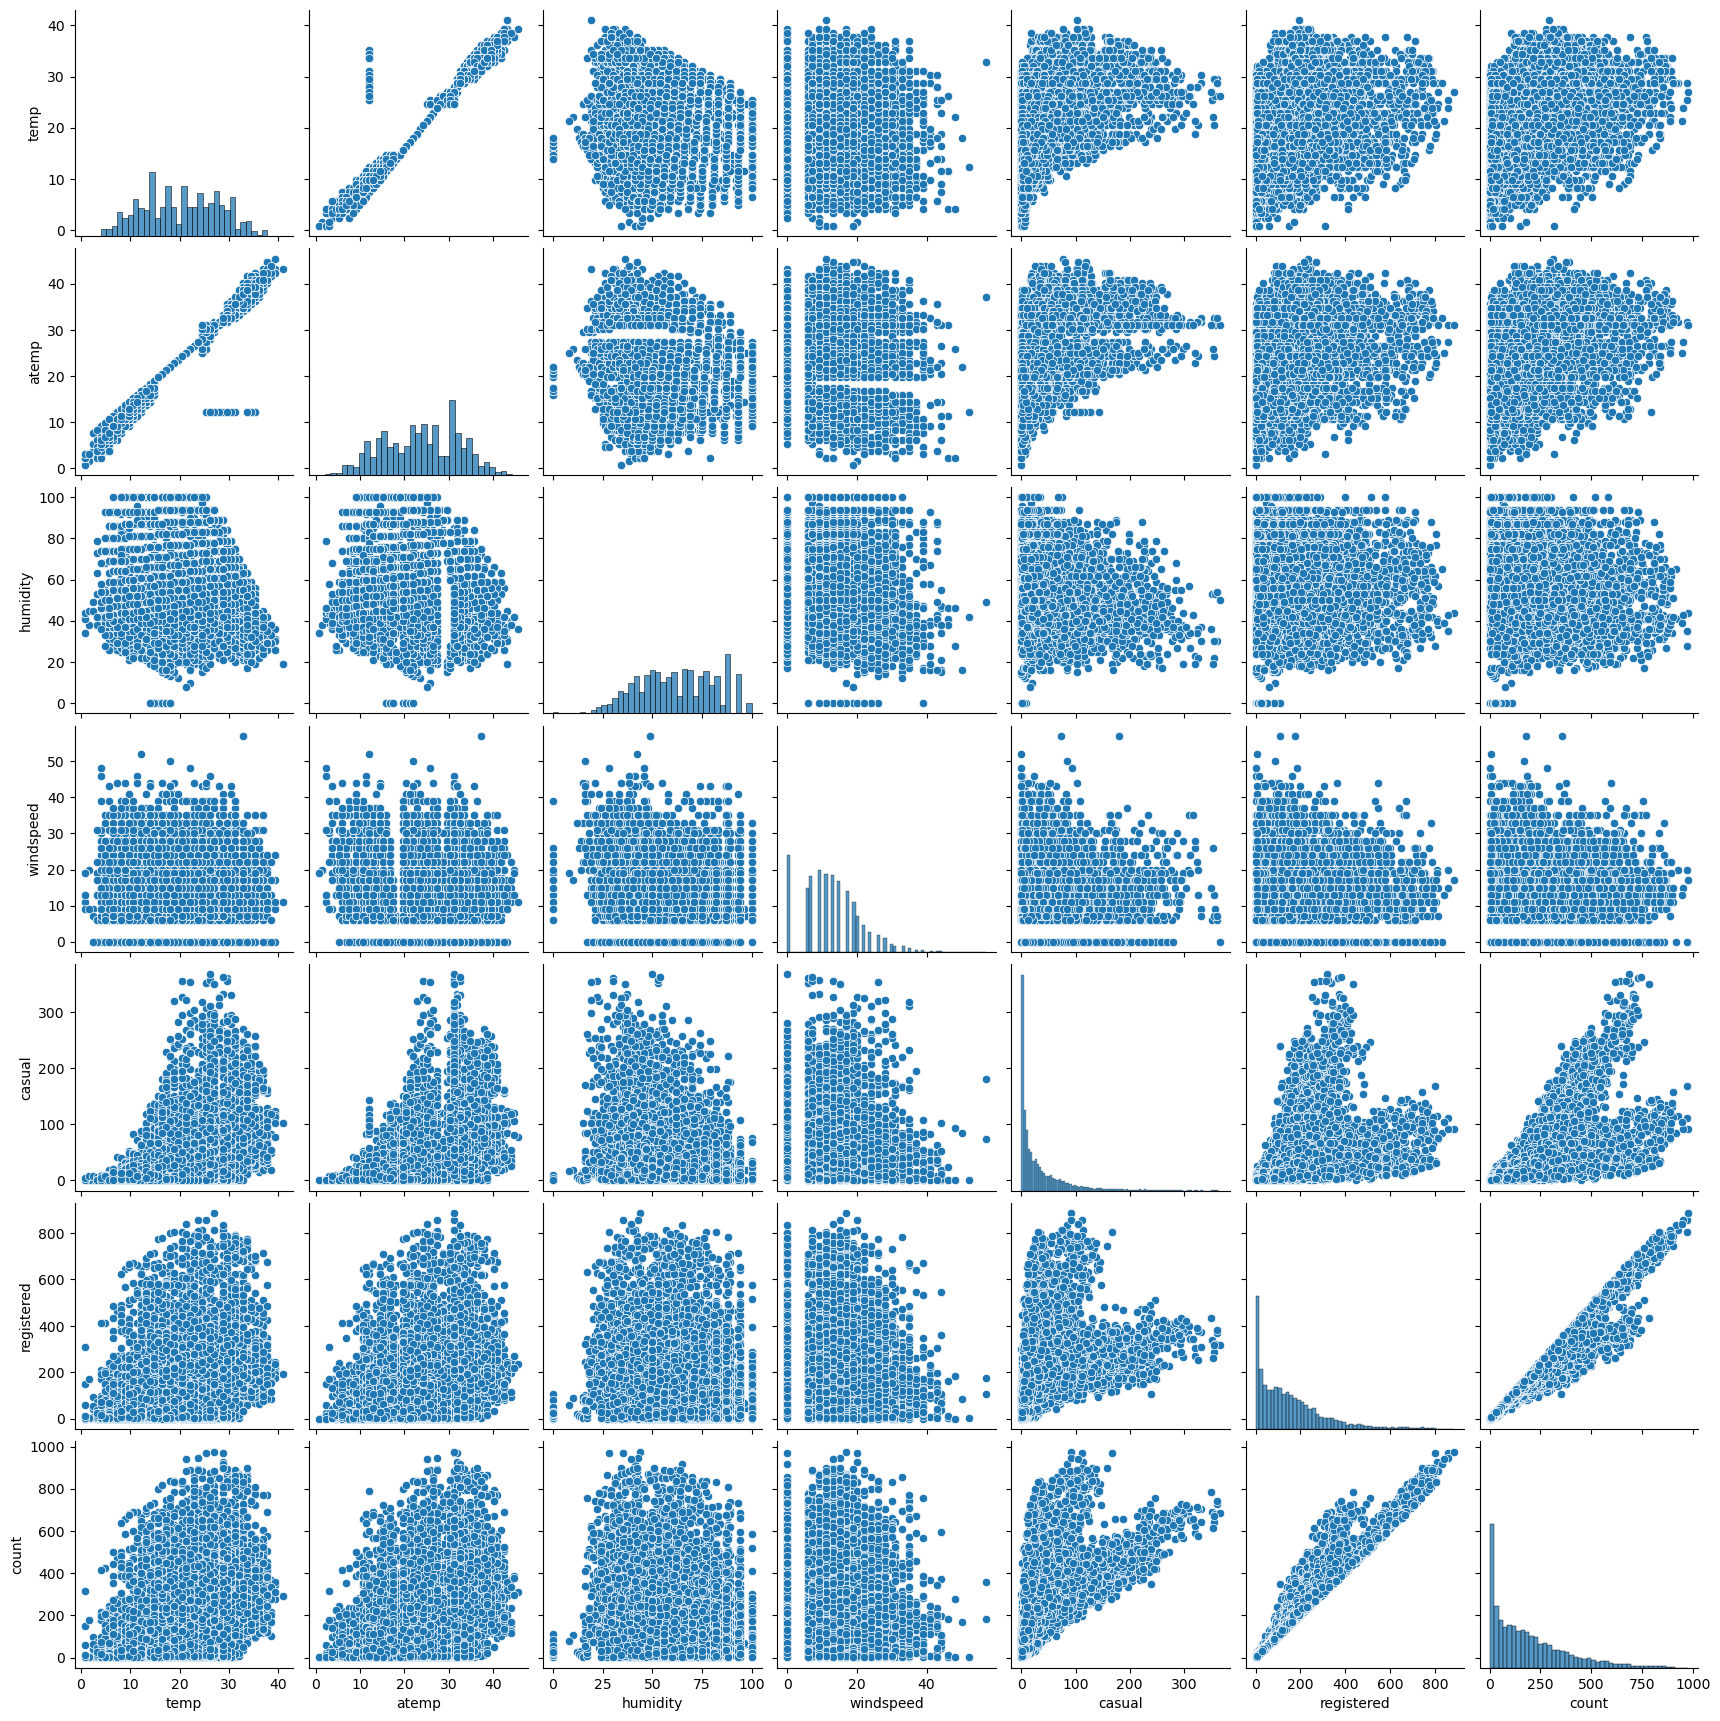

In [211]:
sns.pairplot(df)

# Hypothesis testing

## Hypothesis testing 1
#### Check whether: working Day has effect on number of electric cycles rented
    - Null hypothesis - Working day count mean is same as non working count mean.
    - Alternate hypothesis -  Working day count mean is significantly different as non working count mean.
    - significance level (alpha) = 0.05
    
#### 2 categorical data vs numerical (ttest 2 sample or ANOVA test can be performed).

    - As we have only two samples then we can do 2 sample ttest.
    - Any population distribution is acceptable for 2 sample ttest.
    - Data should be randomly selected and independent to each other.
#### Insights:
    - Working day count mean is same as non working count mean
#### Recommendation :
    - Based on day whether working day / non working day - number of rental varies. recommend to provide offers, increase/decrease no of cycles, incentives etc,.. which as impact revenue. 

In [18]:
alpha = 0.05
wd_count = df[df['workingday'] == 1]['count']
nwd_count = df[df['workingday'] == 0]['count']
  
# ttest 2 sample 
p_val = ttest_ind(wd_count,nwd_count)[1]

print('ttest p value =', round(p_val,2))
print('--------------------------')
if p_val < alpha:
    print('Reject null hypothesis')
    print('Working day count mean is different as non working count mean')
else:
    print('Result = fail to Reject null hypothesis')
    print('Working day count mean is same as non working count mean')
print('--------------------------')

ttest p value = 0.23
--------------------------
Result = fail to Reject null hypothesis
Working day count mean is same as non working count mean
--------------------------


## Hypothesis testing 2
#### Check whether: No. of cycles rented similar or different in different seasons
    - Null hypothesis - Mean count of cycle rented for all season is same.
    - Alternate hypothesis -  Mean count of cycle rented for all season is different.
    - significance level (alpha) = 0.05
    
#### 4 categorical data vs numerical (ANOVA test can be performed).
##### Requirement of ttest or anova test
    - Data should be random and independent
    - Sample Groups should be normal distributed
    - Sample Groups variance should be same.
#### Insights:
    - No. of cycles rented are different in different seasons
#### Recommendation :
    - Based on day whether seasons - number of rental reduces varies. recommend to provide offers, increase/decrease no of cycles, incentives etc,.. which as impact revenue. 

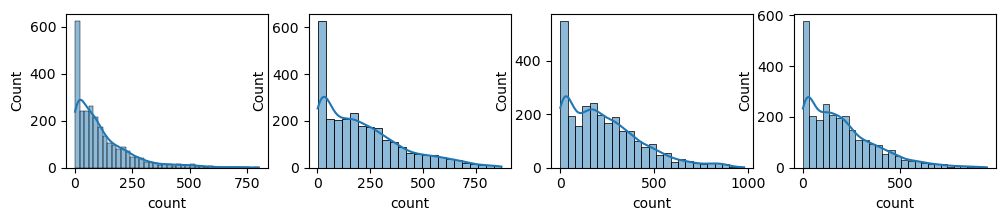

Shapiro test P-values for all sample: 
 [0.00000000e+00 6.03909332e-39 1.04345805e-36 1.13016823e-39]
samples are not normally distributed
Reject Null hypothesis for Shapiro test
------------------------------------------------------------------------
P-value of levene test is 1.0147116860043298e-118
Variance of Groups are different 
Fail to reject Null hypothesis for levene test
------------------------------------------------------------------------
kruskal test p value is 2.479008372608633e-151
*********** Final output *********
Reject null hypothesis
No. of cycles rented are different in different seasons
------------------------------------------------------------------------


In [8]:
# create count dataset for all seasons
s1 = df[df['season'] == 1]['count']
s2 = df[df['season'] == 2]['count']
s3 = df[df['season'] == 3]['count']
s4 = df[df['season'] == 4]['count']

#-------------------------------------------------------------
# Check for groups normal distribution - Shapiro test
# Null hypothesis for Shapiro test - samples are normally distributed
# Alternate hypothesis for Shapiro test - samples are not normally distributed
# signigicant value for Shapiro test - 0.05

# alpha for shapiro test
alpha_s = 0.05
def shapiro_norm_test(series) :
    p_n_val = shapiro(series)[1]
    return p_n_val

# check the normal distribution by histogram
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.histplot(x = s1, kde = True)
plt.subplot(1,4,2)
sns.histplot(x = s2, kde = True)
plt.subplot(1,4,3)
sns.histplot(x = s3, kde = True)
plt.subplot(1,4,4)
sns.histplot(x = s4, kde = True)
plt.show()

s = [s1,s2, s3, s4]
all_p_val = []
for i in s:
    k =shapiro_norm_test(i)
    all_p_val.append(k)
all_p_val = np.array(all_p_val)
print('Shapiro test P-values for all sample: \n',all_p_val)


val = any(all_p_val < alpha_s)
if val ==  True:
    print('samples are not normally distributed')
    print('Reject Null hypothesis for Shapiro test')
else:
    print('samples are normally distributed')
    print('Fail to reject Null hypothesis for Shapiro test')
print('------------------------------------------------------------------------')
    
#-----------------------------------------------------------------------------
# Check for equal variance - levene test
# Null hypothesis for levene test - Variance of Groups are equal 
# Alternate hypothesis for levene test - Variance of Groups are different 
# signigicant value for levene test - 0.05

# alpha for levene test
alpha_l = 0.05
p_n_val = levene(s1,s2, s3, s4)[1]
print('P-value of levene test is', p_n_val)
if p_n_val > alpha_l:
    print('Variance of Groups are equal')
    print('Reject Null hypothesis for levene test')
else:
    print('Variance of Groups are different ')
    print('Fail to reject Null hypothesis for levene test')

print('------------------------------------------------------------------------')
    
#---------------------------------------------------------------------
# since shapiro test and Leven test failed(reject null hypothesis) :
# both samples are not normally distributed & sample variance are different
# we need to proceed with kruskal instead of Anova

alpha = 0.05

# kruskal test
p_val = kruskal(s1,s2,s3,s4)[1]
print('kruskal test p value is', p_val)
print('*********** Final output *********')
if p_val < alpha:
    print('Reject null hypothesis')
    print('No. of cycles rented are different in different seasons')
else:
    print('fail to Reject null hypothesis')
    print('No. of cycles rented are similar/ same in different seasons')

print('------------------------------------------------------------------------')

# Avova test can be done if the requirement of Anova test is full filled.
# f_oneway(array1, array2, array3, array4)

## Hypothesis testing 3
#### Check whether: No. of cycles rented similar or different in different weather
    - Null hypothesis - Mean count of cycle rented for all weather is same.
    - Alternate hypothesis -  Mean count of cycle rented for all weather is different.
    - significance level (alpha) = 0.05
    
#### 4 categorical data vs numerical (ANOVA test can be performed).
##### Requirement of ttest or anova test
    - Data should be random and independent
    - Groups/ population should be normal distributed
    - Groups variance should be same.
#### Insights:
    - No. of cycles rented are different in different weather
#### Recommendation :
    - Based on day whether weather - number of rental reduces varies. recommend to provide offers, increase/decrease no of cycles, incentives etc,.. which as impact revenue. 

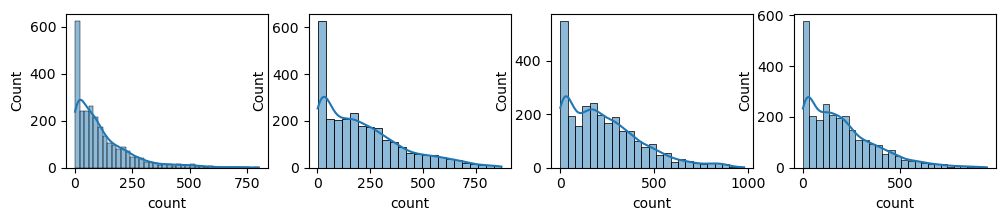

Shapiro test P-values for all sample: 
 [0.00000000e+00 6.03909332e-39 1.04345805e-36 1.13016823e-39]
samples are not normally distributed
Reject Null hypothesis for Shapiro test
------------------------------------------------------------------------
P-value of levene test is 3.504937946833238e-35
Variance of Groups are different 
Fail to reject Null hypothesis for levene test
------------------------------------------------------------------------
kruskal test p value is 3.501611300708679e-44
*********** Final output *********
Reject null hypothesis
No. of cycles rented are different in different weather
------------------------------------------------------------------------


In [75]:
# create count dataset for all seasons
w1 = df[df['weather'] == 1]['count']
w2 = df[df['weather'] == 2]['count']
w3 = df[df['weather'] == 3]['count']
w4 = df[df['weather'] == 4]['count']

#-------------------------------------------------------------
# Check for groups normal distribution - Shapiro test
# Null hypothesis for Shapiro test - samples are normally distributed
# Alternate hypothesis for Shapiro test - samples are not normally distributed
# signigicant value for Shapiro test - 0.05

# alpha for shapiro test
alpha_ws = 0.05
def shapiro_norm_test(series) :
    p_n_val = shapiro(series)[1]
    return p_n_val

# check the normal distribution by histogram
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.histplot(x = s1, kde = True)
plt.subplot(1,4,2)
sns.histplot(x = s2, kde = True)
plt.subplot(1,4,3)
sns.histplot(x = s3, kde = True)
plt.subplot(1,4,4)
sns.histplot(x = s4, kde = True)
plt.show()

total_p = [w1,w2, w3, w4]
all_p_val = []
for i in s:
    k =shapiro_norm_test(i)
    all_p_val.append(k)
all_p_val = np.array(all_p_val)
print('Shapiro test P-values for all sample: \n',all_p_val)

val = any(all_p_val < alpha_ws)
if val ==  True:
    print('samples are not normally distributed')
    print('Reject Null hypothesis for Shapiro test')
else:
    print('samples are normally distributed')
    print('Fail to reject Null hypothesis for Shapiro test')
print('------------------------------------------------------------------------')
    
#-----------------------------------------------------------------------------
# Check for equal variance - levene test
# Null hypothesis for levene test - Variance of Groups are equal 
# Alternate hypothesis for levene test - Variance of Groups are different 
# signigicant value for levene test - 0.05

# alpha for levene test
alpha_l = 0.05
p_n_val = levene(w1, w2, w3, w4)[1]
print('P-value of levene test is', p_n_val)
if p_n_val > alpha_l:
    print('Variance of Groups are equal')
    print('Reject Null hypothesis for levene test')
else:
    print('Variance of Groups are different ')
    print('Fail to reject Null hypothesis for levene test')

print('------------------------------------------------------------------------')
    
#---------------------------------------------------------------------
# since shapiro test and Leven test failed(reject null hypothesis) :
# both samples are not normally distributed & sample variance are different
# we need to proceed with kruskal instead of Anova

alpha = 0.05

# kruskal test
p_val = kruskal(w1, w2, w3, w4)[1]
print('kruskal test p value is', p_val)
print('*********** Final output *********')
if p_val < alpha:
    print('Reject null hypothesis')
    print('No. of cycles rented are different in different weather')
else:
    print('fail to Reject null hypothesis')
    print('No. of cycles rented similar/ same in different weather')

print('------------------------------------------------------------------------')


# Avova test can be done if the requirement of Anova test is full filled.
# f_oneway(array1, array2, array3, array4)

## Hypothesis testing 4
#### Check whether: Weather is dependent on season (check between 2 predictor variable)
    - Null hypothesis - Weather is independent on season.
    - Alternate hypothesis -  Weather is dependent on season.
    - significance level (alpha) = 0.05
    
####  categorical data vs categorical data (Chi square test can be performed).
##### Requirement of ttest or Chi square test
    - Data should be random and independent
    - Both variable should be categorical data
    - Both variable should have frequency data
#### Insights:
    - Weather is dependent on season
#### Recommendation :
    - Recommend check weather forecast and type of seaons, based on this variable rental depends and in turn revenue impacts.

In [84]:
# define significane value
alpha = 0.05

# get contingency table for weahter and season
cont_table = pd.crosstab(df['weather'], df['season'])
cont_table

# calculate chisquare test and get p value
p_val = chi2_contingency(cont_table)[1]

print('chisquare test p value is', p_val)
print('*********** Final output *********')
if p_val < alpha:
    print('Reject null hypothesis')
    print('Weather is dependent on season')
else:
    print('fail to Reject null hypothesis')
    print('Weather is independent on season')

print('------------------------------------------------------------------------')

chisquare test p value is 1.5499250736864862e-07
*********** Final output *********
Reject null hypothesis
Weather is dependent on season
------------------------------------------------------------------------
